In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = pd.read_csv(r'C:\bootcamp\Data Science Bootcamp Data_2.0.csv')
file.head()

,Quest No,Age,Gender,Employment Category,Education,Income,Location,Bank,No of Years,Most frequently used Bank,...,Payint,Paycab,Mig1,Mig2,Mig3,Rec,Changeplan,FromBank,ToBank,ChangeReasons
0,ABJ/2015/002/196,31-35,No Response,Civil/Public Servant,OND/HND,"N50,000 - N100,000",Abuja,Bank A,12.0,Bank A,...,NaN,NaN,NaN,NaN,NaN,Sometimes will,No,NaN,NaN,NaN
1,ABJ/2015/002/196,31-35,No Response,Civil/Public Servant,OND/HND,"N50,000 - N100,000",Abuja,Bank M,6.0,Bank A,...,NaN,NaN,NaN,NaN,NaN,0,No,NaN,NaN,NaN
2,KAN/2015/001/228,31-35,No Response,Self Employed,Bachelor's Decree,"Below N50,000",Kano,Bank J,2.0,Bank B,...,NaN,NaN,Yes,NaN,NaN,Absolutely will,No,NaN,NaN,NaN
3,KAN/2015/001/228,31-35,No Response,Self Employed,Bachelor's Decree,"Below N50,000",Kano,Bank B,NaN,Bank B,...,NaN,NaN,Yes,NaN,NaN,Often will,No,NaN,NaN,NaN
4,KAN/2015/04/061,21-30,Male,Private Sector Employee,Bachelor's Decree,"Below N50,000",Kano,Bank C,5.0,Bank C,...,Yes,NaN,Yes,NaN,NaN,Often will,No,NaN,NaN,NaN


In [3]:
# exploring the internet colunm and classfying
# freqUSSD
internet_dict = dict(file['FreqUSSD'].value_counts())
print (internet_dict)

{'Never': 20059, 'Rarely': 6752, 'At least once a week': 5130, 'No Response': 4578, 'Monthly': 3144, 'At Least once a day': 2989}


In [4]:
# classfying internet users into '0' and '1'
file['FreqUSSD'][file['FreqUSSD'] == 'Never'] = 0
file['FreqUSSD'][file['FreqUSSD'] == 'No Response'] = 0
file['FreqUSSD'][file['FreqUSSD'] == 'At least once a week'] = 1
file['FreqUSSD'][file['FreqUSSD'] == 'Rarely'] = 0
file['FreqUSSD'][file['FreqUSSD'] == 'Monthly'] = 1
file['FreqUSSD'][file['FreqUSSD'] == 'At Least once a day'] = 1
file['FreqUSSD'].value_counts()

C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\ACER\Anaconda3\lib\site

0    31389
1    11263
Name: FreqUSSD, dtype: int64

In [5]:
Education_dict = (file['Education'].value_counts())
print (Education_dict)

Bachelor's Decree                       17163
OND/HND                                 11187
Secondary school leaving certificate     7880
Master's Degree                          4232
No Response                               645
Primary School leaving certificate        636
PHD                                       546
No Formal Education                       324
Others                                     39
Name: Education, dtype: int64


In [6]:
No_of_years_dict = (file['No of Years '].value_counts())
No_of_years_dict.keys()


Float64Index([ 5.0,  3.0,  2.0,  4.0,  1.0, 10.0,  6.0,  7.0,  8.0,  9.0, 12.0,
              15.0, 11.0, 20.0, 13.0, 14.0, 16.0, 17.0, 18.0, 25.0, 30.0, 22.0,
              21.0, 19.0, 23.0, 35.0, 28.0, 26.0, 24.0, 27.0, 40.0, 33.0, 32.0,
              31.0, 37.0, 29.0, 38.0, 34.0, 36.0, 39.0,  0.0,  1.5, 42.0, 51.0,
              45.0, 50.0, 41.0, 55.0],
             dtype='float64')

In [7]:
# create a new dataframe for the classification
new_frame = file[['FreqUSSD', 'No of Years ', 'Education', 'Bank', 'Balenq']]
new_frame.head()

,FreqUSSD,No of Years,Education,Bank,Balenq
0,0,12.0,OND/HND,Bank A,ATM
1,0,6.0,OND/HND,Bank M,ATM
2,1,2.0,Bachelor's Decree,Bank J,ATM
3,1,NaN,Bachelor's Decree,Bank B,ATM
4,0,5.0,Bachelor's Decree,Bank C,ATM


In [8]:
file['Education'][file['Education'] == "Bachelor's Decree"] = 1
file['Education'][file['Education'] == "OND/HND"] = 1
file['Education'][file['Education'] == "Secondary school leaving certificate"] = 0
file['Education'][file['Education'] == "Master's Degree"] = 1
file['Education'][file['Education'] == "No Response"] = 0
file['Education'][file['Education'] == "Primary School leaving certificate"] = 0
file['Education'][file['Education'] == "PHD"] = 1
file['Education'][file['Education'] == "No Formal Education"] = 0
file['Education'][file['Education'] == "Others"] = 0

file['Education'].value_counts()

C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ACER\Anaconda

1    33128
0     9524
Name: Education, dtype: int64

In [9]:
# classifying members of 10 years experience and above as 1 and less years as 0
file['No of Years '][file['No of Years '] < 10.0] = 0
file['No of Years '][file['No of Years '] >= 10.0] = 1
file['No of Years '].value_counts()

C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0.0    33231
1.0     8155
Name: No of Years , dtype: int64

In [23]:
#new_frame['FreqUSSD'].astype(int)
# create a new dataframe for the classification
new_frame = file[['FreqUSSD', 'No of Years ', 'Education', 'Bank', 'Balenq']]
new_frame.head()
final_frame =new_frame.dropna()


In [24]:
file.shape

(42653, 152)

In [25]:
final_frame.shape

(41133, 5)

In [29]:
final_frame['No of Years '] =final_frame['No of Years '].astype(int)
final_frame.head()

C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,FreqUSSD,No of Years,Education,Bank,Balenq
0,0,1,1,Bank A,ATM
1,0,0,1,Bank M,ATM
2,1,0,1,Bank J,ATM
4,0,0,1,Bank C,ATM
5,0,0,0,Bank D,ATM


In [61]:
his

{(0, 0, 0): 7,
 (0, 0, 1): 6,
 (0, 1, 0): 5,
 (0, 1, 1): 4,
 (1, 0, 0): 3,
 (1, 0, 1): 2,
 (1, 1, 0): 1,
 (1, 1, 1): 0}

In [64]:
for i in range(len(workfile)):
    try:
        workfile['Balenq'][i] = his[(workfile['FreqUSSD'][i], workfile['No of Years '][i], workfile['Education'][i])]
    except KeyError:
        pass

C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ACER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [66]:
workfile['Balenq'].value_counts()

6                          16971
2                           7060
7                           6083
4                           4923
0                           1821
3                           1615
5                            994
ATM                          732
Internet/Mobile Banking      390
Branch                       230
1                            167
No Response                   89
Mobile payments               29
Call Center                   15
POS                           14
Name: Balenq, dtype: int64

In [108]:
last_dic = dict(workfile['Balenq'].value_counts())
for i in last_dic.keys():
    division = last_dic[i]/len(workfile['Balenq'])
    print (division, i)

0.412588432645 6
0.171638343909 2
0.147886125495 7
0.119684924513 4
0.044271023266 0
0.0392628789536 3
0.0241655118761 5
0.017795930275 ATM
0.00948143826125 Internet/Mobile Banking
0.00559161743612 Branch
0.00406000048623 1
0.00216371283398 No Response
0.000705030024554 Mobile payments
0.000364670702356 Call Center
0.000340359322199 POS


In [93]:
workfile['Bank'].value_counts()


Bank C    6523
Bank B    5891
Bank A    4242
Bank D    4076
Bank H    3825
Bank L    2561
Bank N    2446
Bank G    1953
Bank F    1857
Bank J    1781
Bank I    1127
Bank K    1028
Bank E     984
Bank O     907
Bank Q     796
Bank P     580
Bank M     556
Name: Bank, dtype: int64

In [98]:
counter = 0
list1 = []
for i in workfile['Bank']:
    try:
        if  i == 'Bank C':
            name = workfile['Balenq'][counter]
            list1.append(name)
            counter += 1
    except KeyError:
        pass
    counter += 1
        
      

In [105]:
for i in range(7):
    print (list1.count(i), i)
    

249 0
26 1
976 2
217 3
704 4
139 5
2461 6


In [91]:
counter = 0
def runthis():
    try:
        counter =0
        fileList =[]
        for i in workfile['Bank']:
            if i == 'Bank C':
                value = workfile['Balenq'][counter]
                fileList.append(value)
                counter += 1
            else:
                counter += 1
    except KeyError:
        counter += 1
    return fileList
runthis()

[]

In [78]:
type(workfile['Balenq'])

pandas.core.series.Series

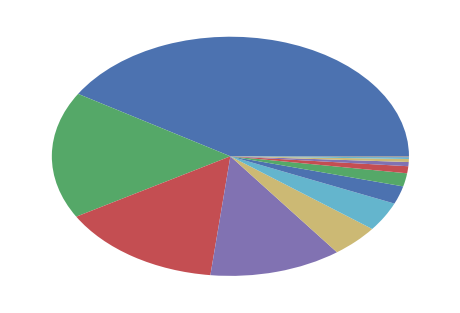

In [76]:
plt.pie(workfile['Balenq'].value_counts())
plt.show()

In [111]:
solution_file = file.dropna()


In [114]:
print (solution_file['Location'])

Series([], Name: Location, dtype: object)


In [79]:
workfile['Balenq'].astype(str)
i = 0
newlist = []
for i in workfile['Balenq']:
    if i == 'ATM':
        try:
            workfile['Balenq'][i] = his[(workfile['FreqUSSD'][i], workfile['No of Years '][i], workfile['Education'][i])]
        except KeyError:
            pass
    else:
        this = his[(workfile['FreqUSSD'][i], workfile['No of Years '][i], workfile['Education'][i])]
        final = (this, i)
        newlist.append(final)
#workfile['Balenq'].value_counts()

KeyError: 3